In [1]:
import pandas as pd
covid_db = pd.read_csv('data/covid_data.csv', sep=',')
covid = covid_db.copy()

country_vaccinations_db = pd.read_csv('data/country_vaccinations.csv', sep=',')
vaccinations_data = country_vaccinations_db.copy()




In [2]:
covid

date     province/state      country  confirmed  deaths  \
0       01/22/2020              Anhui        China        1.0     0.0   
1       01/22/2020            Beijing        China       14.0     0.0   
2       01/22/2020          Chongqing        China        6.0     0.0   
3       01/22/2020             Fujian        China        1.0     0.0   
4       01/22/2020              Gansu        China        0.0     0.0   
...            ...                ...          ...        ...     ...   
306424  05/29/2021  Zaporizhia Oblast      Ukraine   102641.0  2335.0   
306425  05/29/2021            Zeeland  Netherlands    29147.0   245.0   
306426  05/29/2021           Zhejiang        China     1364.0     1.0   
306427  05/29/2021    Zhytomyr Oblast      Ukraine    87550.0  1738.0   
306428  05/29/2021       Zuid-Holland  Netherlands   391559.0  4252.0   

        recovered  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
306424    95289.0  
306425        0.0  
306426     1324.0  
306427    83790.0  
306428        0.0  

[306429 rows x 6 columns]

In [3]:
vaccinations_data

country iso_code        date  total_vaccinations  \
0      Afghanistan      AFG  2021-02-22                 0.0   
1      Afghanistan      AFG  2021-02-23                 NaN   
2      Afghanistan      AFG  2021-02-24                 NaN   
3      Afghanistan      AFG  2021-02-25                 NaN   
4      Afghanistan      AFG  2021-02-26                 NaN   
...            ...      ...         ...                 ...   
42790     Zimbabwe      ZWE  2021-09-01           4270430.0   
42791     Zimbabwe      ZWE  2021-09-02           4323735.0   
42792     Zimbabwe      ZWE  2021-09-03           4372216.0   
42793     Zimbabwe      ZWE  2021-09-04           4400246.0   
42794     Zimbabwe      ZWE  2021-09-05           4431599.0   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0                    0.0                      NaN                     NaN   
1                    NaN                      NaN                     NaN   
2                    NaN                      NaN                     NaN   
3                    NaN                      NaN                     NaN   
4                    NaN                      NaN                     NaN   
...                  ...                      ...                     ...   
42790          2615233.0                1655197.0                 50606.0   
42791          2649505.0                1674230.0                 53305.0   
42792          2681657.0                1690559.0                 48481.0   
42793          2698332.0                1701914.0                 28030.0   
42794          2713248.0                1718351.0                 31353.0   

       daily_vaccinations  total_vaccinations_per_hundred  \
0                     NaN                            0.00   
1                  1367.0                             NaN   
2                  1367.0                             NaN   
3                  1367.0                             NaN   
4                  1367.0                             NaN   
...                   ...                             ...   
42790             36416.0                           28.30   
42791             39711.0                           28.65   
42792             42317.0                           28.97   
42793             41413.0                           29.16   
42794             41964.0                           29.36   

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                               0.00                                  NaN   
1                                NaN                                  NaN   
2                                NaN                                  NaN   
3                                NaN                                  NaN   
4                                NaN                                  NaN   
...                              ...                                  ...   
42790                          17.33                                10.97   
42791                          17.56                                11.09   
42792                          17.77                                11.20   
42793                          17.88                                11.28   
42794                          17.98                                11.39   

       daily_vaccinations_per_million  \
0                                 NaN   
1                                34.0   
2                                34.0   
3                                34.0   
4                                34.0   
...                               ...   
42790                          2413.0   
42791                          2631.0   
42792                          2804.0   
42793                          2744.0   
42794                          2781.0   

                                                vaccines  \
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  

In [4]:
covid

date     province/state      country  confirmed  deaths  \
0       01/22/2020              Anhui        China        1.0     0.0   
1       01/22/2020            Beijing        China       14.0     0.0   
2       01/22/2020          Chongqing        China        6.0     0.0   
3       01/22/2020             Fujian        China        1.0     0.0   
4       01/22/2020              Gansu        China        0.0     0.0   
...            ...                ...          ...        ...     ...   
306424  05/29/2021  Zaporizhia Oblast      Ukraine   102641.0  2335.0   
306425  05/29/2021            Zeeland  Netherlands    29147.0   245.0   
306426  05/29/2021           Zhejiang        China     1364.0     1.0   
306427  05/29/2021    Zhytomyr Oblast      Ukraine    87550.0  1738.0   
306428  05/29/2021       Zuid-Holland  Netherlands   391559.0  4252.0   

        recovered  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
306424    95289.0  
306425        0.0  
306426     1324.0  
306427    83790.0  
306428        0.0  

[306429 rows x 6 columns]

Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:

In [5]:
covid = covid.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

Преобразуем даты в формат datetime с помощью функции pd.to_datetime():



In [6]:
covid['date'] = pd.to_datetime(covid['date'])

Создадим признак больных на данный момент (active). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:



In [7]:
covid['active'] = covid['confirmed'] - covid['deaths'] - covid['recovered']

Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():

In [8]:
covid = covid.sort_values(by=['country', 'date'])
covid['daily_confirmed'] = covid.groupby('country')['confirmed'].diff()
covid['daily_deaths'] = covid.groupby('country')['deaths'].diff()
covid['daily_recovered'] = covid.groupby('country')['recovered'].diff()



В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:

In [9]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
vaccinations_data 


country iso_code       date  total_vaccinations  people_vaccinated  \
0      Afghanistan      AFG 2021-02-22                 0.0                0.0   
1      Afghanistan      AFG 2021-02-23                 NaN                NaN   
2      Afghanistan      AFG 2021-02-24                 NaN                NaN   
3      Afghanistan      AFG 2021-02-25                 NaN                NaN   
4      Afghanistan      AFG 2021-02-26                 NaN                NaN   
...            ...      ...        ...                 ...                ...   
42790     Zimbabwe      ZWE 2021-09-01           4270430.0          2615233.0   
42791     Zimbabwe      ZWE 2021-09-02           4323735.0          2649505.0   
42792     Zimbabwe      ZWE 2021-09-03           4372216.0          2681657.0   
42793     Zimbabwe      ZWE 2021-09-04           4400246.0          2698332.0   
42794     Zimbabwe      ZWE 2021-09-05           4431599.0          2713248.0   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                          NaN                     NaN                 NaN   
1                          NaN                     NaN              1367.0   
2                          NaN                     NaN              1367.0   
3                          NaN                     NaN              1367.0   
4                          NaN                     NaN              1367.0   
...                        ...                     ...                 ...   
42790                1655197.0                 50606.0             36416.0   
42791                1674230.0                 53305.0             39711.0   
42792                1690559.0                 48481.0             42317.0   
42793                1701914.0                 28030.0             41413.0   
42794                1718351.0                 31353.0             41964.0   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                                0.00                           0.00   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                            NaN   
...                               ...                            ...   
42790                           28.30                          17.33   
42791                           28.65                          17.56   
42792                           28.97                          17.77   
42793                           29.16                          17.88   
42794                           29.36                          17.98   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                      NaN                             NaN   
1                                      NaN                            34.0   
2                                      NaN                            34.0   
3                                      NaN                            34.0   
4                                      NaN                            34.0   
...                                    ...                             ...   
42790                                10.97                          2413.0   
42791                                11.09                          2631.0   
42792                                11.20                          2804.0   
42793                                11.28                          2744.0   
42794                                11.39                          2781.0   

                                                vaccines  \
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

За какой период представлены данные в таблице covid_data? В качестве ответа введите даты в формате datetime (без указания времени).
Введите ответ в следующем формате (без пробелов): ГГГГ-ММ-ДД-ГГГГ-ММ-ДД

In [10]:


display(covid['date'].min())
display(covid['date'].max())

Timestamp('2020-01-22 00:00:00')

Timestamp('2021-05-29 00:00:00')

За какой период представлены данные в таблице vaccinations_data? В качестве ответа введите даты в формате datetime без указания времени.
Введите ответ в следующем формате (без пробелов): ГГГГ-ММ-ДД-ГГГГ-ММ-ДД

In [11]:
display(vaccinations_data['date'].min())
display(vaccinations_data['date'].max())

Timestamp('2020-12-02 00:00:00')

Timestamp('2021-09-06 00:00:00')

С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country.
Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в задании 3.1. То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более. Результат объединения занесите в переменную covid_df.
Сохраните таблицу covid_df — она понадобится нам в следующем юните.

In [12]:
covid_df = covid.merge(vaccinations_data, on=['date', 'country'], how='left')
print('Число строк: ', covid_df.shape[0])
print('Число столбцов: ', covid_df.shape[1])
covid_df

Число строк:  86785
Число столбцов:  22


date                         country  confirmed  deaths  \
0     2020-02-24                     Afghanistan        1.0     0.0   
1     2020-02-25                     Afghanistan        1.0     0.0   
2     2020-02-26                     Afghanistan        1.0     0.0   
3     2020-02-27                     Afghanistan        1.0     0.0   
4     2020-02-28                     Afghanistan        1.0     0.0   
...          ...                             ...        ...     ...   
86780 2020-03-12  occupied Palestinian territory        0.0     0.0   
86781 2020-03-14  occupied Palestinian territory        0.0     0.0   
86782 2020-03-15  occupied Palestinian territory        0.0     0.0   
86783 2020-03-16  occupied Palestinian territory        0.0     0.0   
86784 2020-03-17  occupied Palestinian territory        0.0     0.0   

       recovered  active  daily_confirmed  daily_deaths  daily_recovered  \
0            0.0     1.0              NaN           NaN              NaN   
1            0.0     1.0              0.0           0.0              0.0   
2            0.0     1.0              0.0           0.0              0.0   
3            0.0     1.0              0.0           0.0              0.0   
4            0.0     1.0              0.0           0.0              0.0   
...          ...     ...              ...           ...              ...   
86780        0.0     0.0              0.0           0.0              0.0   
86781        0.0     0.0              0.0           0.0              0.0   
86782        0.0     0.0              0.0           0.0              0.0   
86783        0.0     0.0              0.0           0.0              0.0   
86784        0.0     0.0              0.0           0.0              0.0   

      iso_code  ...  people_fully_vaccinated  daily_vaccinations_raw  \
0          NaN  ...                      NaN                     NaN   
1          NaN  ...                      NaN                     NaN   
2          NaN  ...                      NaN                     NaN   
3          NaN  ...                      NaN                     NaN   
4          NaN  ...                      NaN                     NaN   
...        ...  ...                      ...                     ...   
86780      NaN  ...                      NaN                     NaN   
86781      NaN  ...                      NaN                     NaN   
86782      NaN  ...                      NaN                     NaN   
86783      NaN  ...                      NaN                     NaN   
86784      NaN  ...                      NaN                     NaN   

       daily_vaccinations  total_vaccinations_per_hundred  \
0                     NaN                             NaN   
1                     NaN                             NaN   
2                     NaN                             NaN   
3                     NaN                             NaN   
4                     NaN                             NaN   
...                   ...                             ...   
86780                 NaN                             NaN   
86781                 NaN                             NaN   
86782                 NaN                             NaN   
86783                 NaN                             NaN   
86784                 NaN                             NaN   

       people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                                NaN                                  NaN   
1                                NaN                                  NaN   
2                                NaN                                  NaN   
3                                NaN                                  NaN   
4                                NaN                                  NaN   
...                              ...                                  ...   
86780                            NaN                                  NaN   
86781                           

В получившейся в задании 3.3 таблице covid_df создайте признаки death_rate — общий процент смертей среди зафиксированных случаев (летальность) и recover_rate — общий процент случаев выздоровления. Данные характеристики рассчитайте как отношение числа смертей (deaths) и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%.

In [13]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
var = covid_df.groupby('country')['death_rate'].max()
var.index
usa_death_rate = var.loc['United States']
print(usa_death_rate)

display(covid_df.groupby('country')['recover_rate'].mean().loc['Russia'])

7.18954248366013


67.06273489477655

построение графика


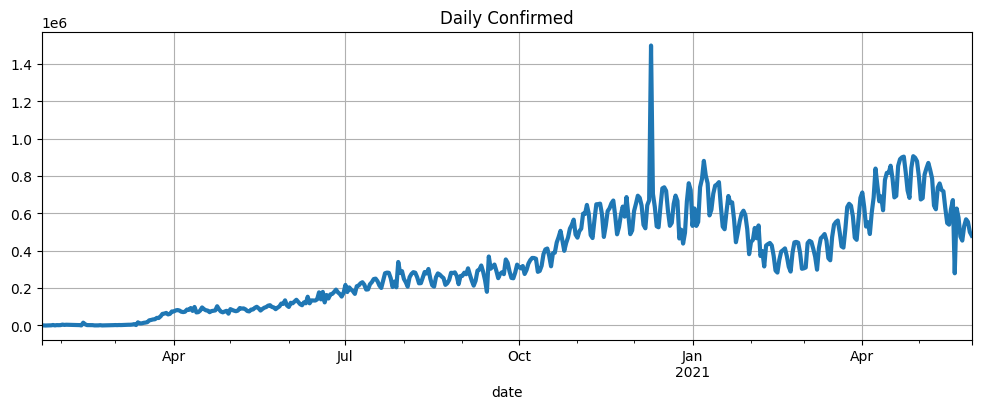

In [14]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
  kind='line', figsize=(12,4),title='Daily Confirmed',
  grid=True, lw=3
);

<Axes: title={'center': 'Распределение ежедневной заболеваемости'}, ylabel='Frequency'>

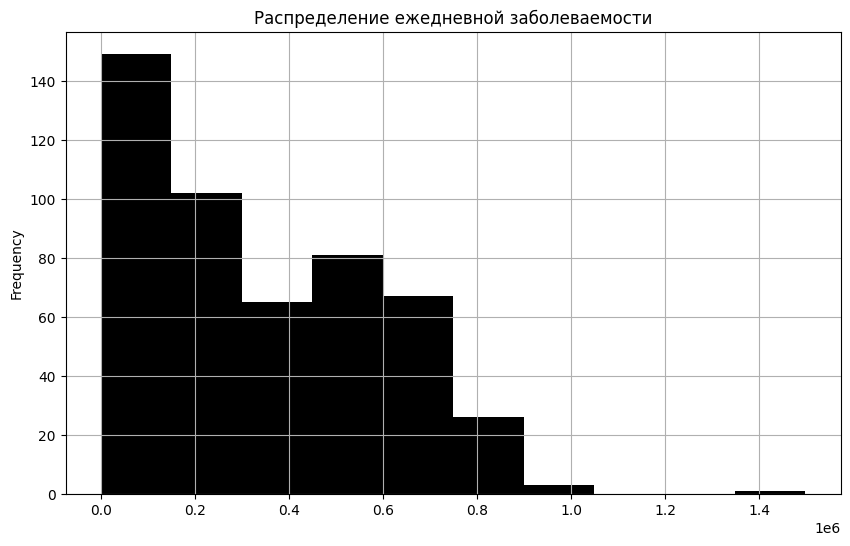

In [15]:
grouped_cases.plot(
  kind='hist',figsize=(10,6), title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
)

Давайте построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.

Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью агрегирующего метода last() — он возвращает последнее значение в столбце DataFrame.

Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. Параметр colormap отвечает за цветовую гамму графика.

<Axes: xlabel='country'>

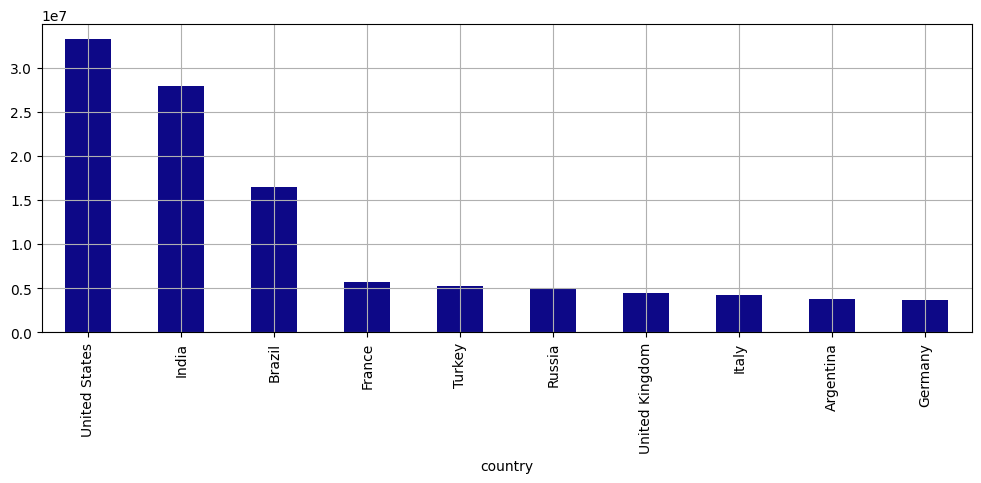

In [16]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
  kind='bar',
  grid=True,
  figsize=(12,4),
  colormap='plasma'
)

А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. Для этого отобразим сразу два показателя на столбчатой диаграмме: 

<Axes: xlabel='country'>

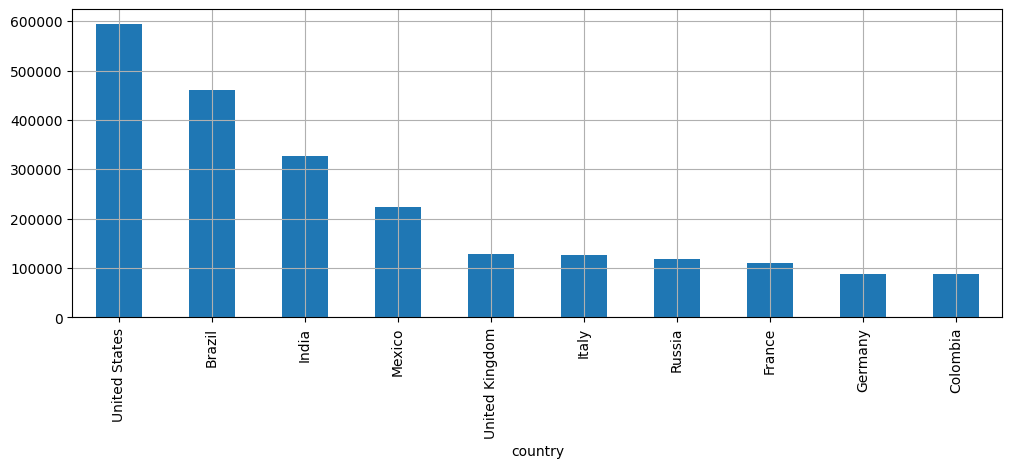

In [17]:
grouped_country = covid_df.groupby(['country'])['deaths'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot( kind='bar',     grid=True,     figsize=(12, 4))

Постройте график из задания 4.4. В какой стране число вакцинированных наименьшее?
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

<Axes: xlabel='country'>

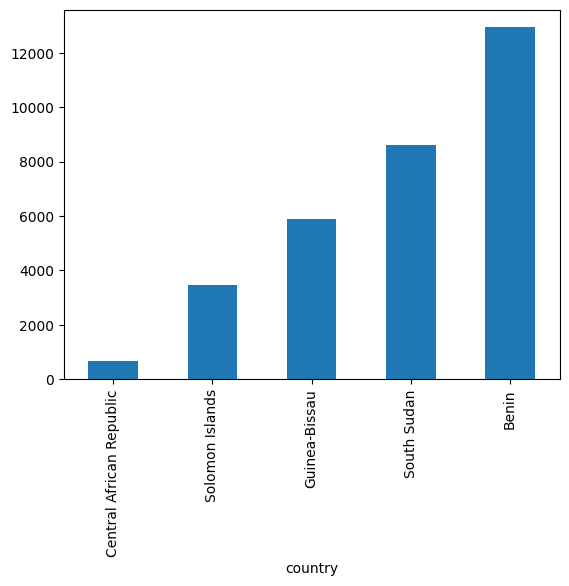

In [18]:
covid_df.groupby('country')['total_vaccinations'].last().nsmallest(5).plot(kind='bar')

За визуализацию графиков в Matplotlib отвечает модуль pyplot. Традиционно он импортируется под псевдонимом plt. Для более корректного отображения графиков в ноутбуках используется команда %matplotlib inline.

import matplotlib.pyplot as plt
%matplotlib inline
Примечание. Если вы используете тёмную тему в VS Code, то для корректного отображения графиков на тёмном фоне выполните следующую команду по установке стиля отображения:

plt.style.use('default')

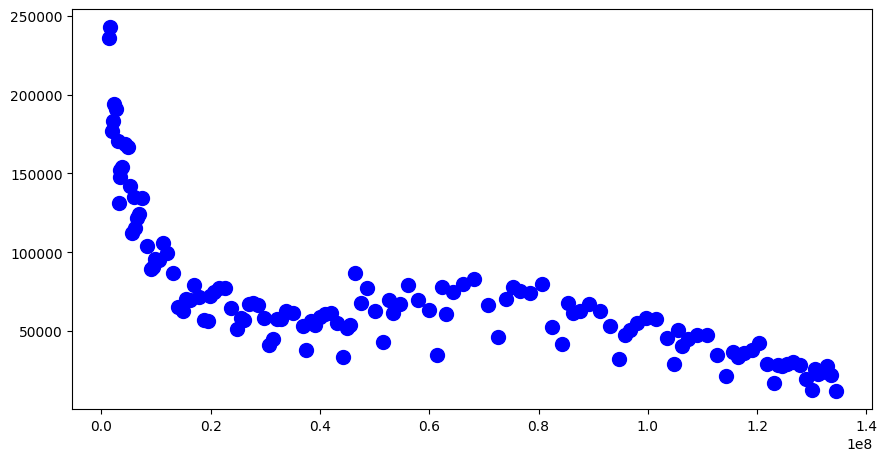

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])

us_data = covid_df[covid_df['country'] == 'United States']
axes.scatter(x=us_data['people_fully_vaccinated'], y=us_data['daily_confirmed'],s=100,
    marker='o',
    c = 'blue')

# us_data[['date','people_fully_vaccinated','daily_confirmed']]

Построим круговую диаграмму, чтобы отобразить ТОП-10 комбинаций вакцин в мире.

vaccines
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech        3059
Oxford/AstraZeneca                                                   1340
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                         1293
Oxford/AstraZeneca, Sinopharm/Beijing                                1280
Oxford/AstraZeneca, Pfizer/BioNTech                                  1082
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V     830
Moderna, Pfizer/BioNTech                                              818
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing                440
Pfizer/BioNTech                                                       404
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V               401
Name: count, dtype: int64


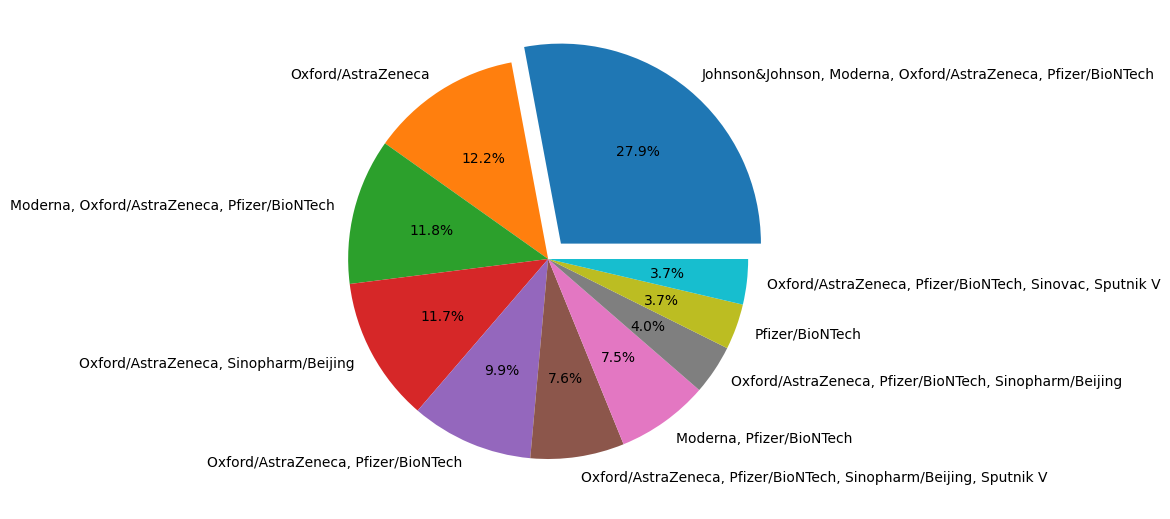

In [20]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
print(vaccine_combinations)
fig = plt.figure(
  figsize=(5,5)
)
axes = fig.add_axes([0,0,1,1])
axes.pie(
  vaccine_combinations, labels=vaccine_combinations.index,
  autopct='%.1f%%',explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

, изобразим на одном графике, как росла общая заболеваемость (confirmed), число зафиксированных смертей (deaths), выздоровевших пациентов (recovered) и активных случаев (active) в Китае.

Для построения линейных графиков в Matplotlib используется метод plot() (не путайте с методом plot() в Pandas!). При вызове метода без параметров по оси ординат откладываются значения столбца таблицы, по оси абсцисс — индексы (в нашем случае это будут даты). 

Дополнительно в параметрах метода указываем параметр label — название графика, которое будет отображаться на легенде, а также lw — ширину линии графика. Добавим к графику заголовок, названия осей, установим метки по оси y с частотой в 10 000, повернём метки по оси x на 30 градусов, а также добавим легенду (метки для легенды выставляются в параметре label метода plot()):

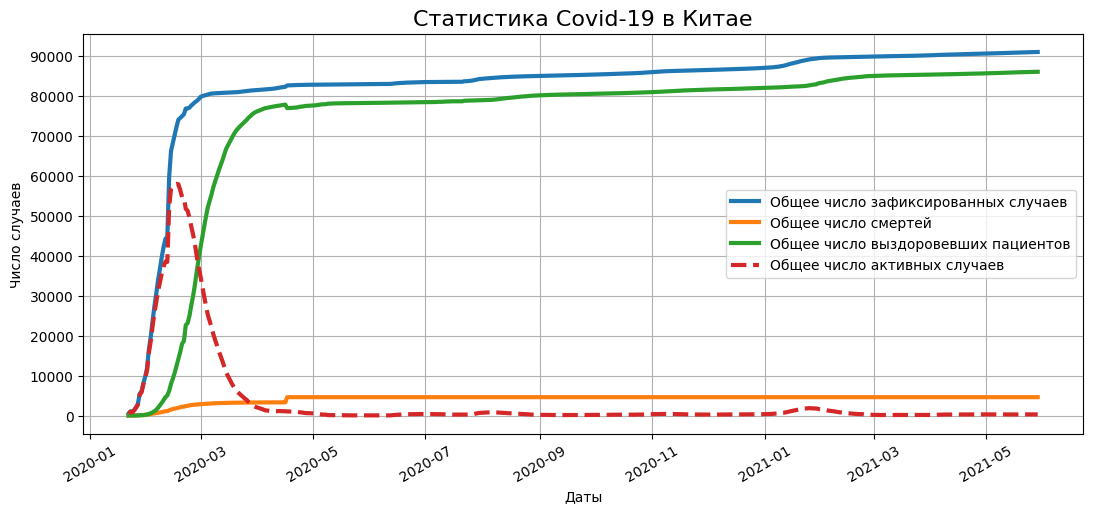

In [21]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()
fig = plt.figure(figsize=(10,4))
axes = fig.add_axes([0,0,1,1])
axes.plot(china_grouped['confirmed'],label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'],label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'],label='Общее число активных случаев', lw=3, linestyle='dashed' )

axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

Группируем таблицу по странам, находим последний по дате зафиксированный показатель с помощью метода last() и выбираем ТОП-5 стран с использованием метода nlargest().

При отображении графиков создаём две координатные плоскости main_axes и insert_axes, на каждой из них отдельно строим столбчатые диаграммы.

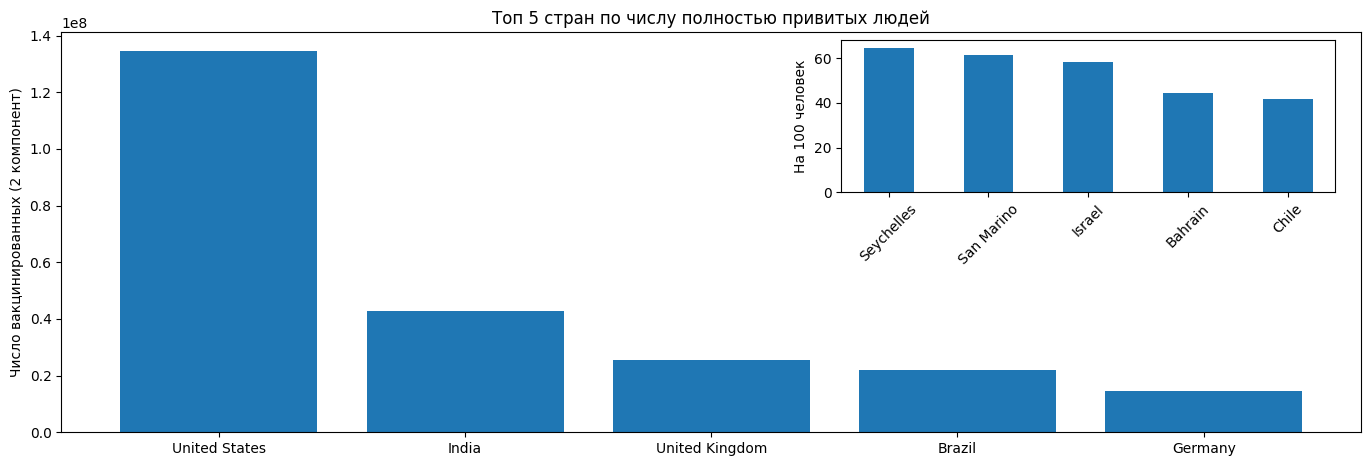

In [22]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

fig = plt.figure(
  figsize=(13,4)
)
main_axes = fig.add_axes([0,0,1,1])
main_axes.bar(x = vacc_country.index, height= vacc_country)
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar( x=vacc_country_per_hundred.index, height=vacc_country_per_hundred,width=0.5)
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

Создание дополнительных систем координат с помощью метода add_axes() полезно, однако используется не так часто.

В большинстве случаев для отображения нескольких систем координат используется функция subplots(). Она создаёт целую таблицу из систем координат на одной фигуре. Функция возвращает новую фигуру, а также список координатных плоскостей.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

Теперь, обладая знаниями о методе subplots(), построим три графика:

Столбчатую диаграмму, которая покажет динамику ежедневной вакцинации в России.
Линейный график изменения ежедневной заболеваемости в стране.
Гистограмму ежедневной заболеваемости в стране.
За построение гистограмм в библиотеке Matplotlib отвечает метод hist().

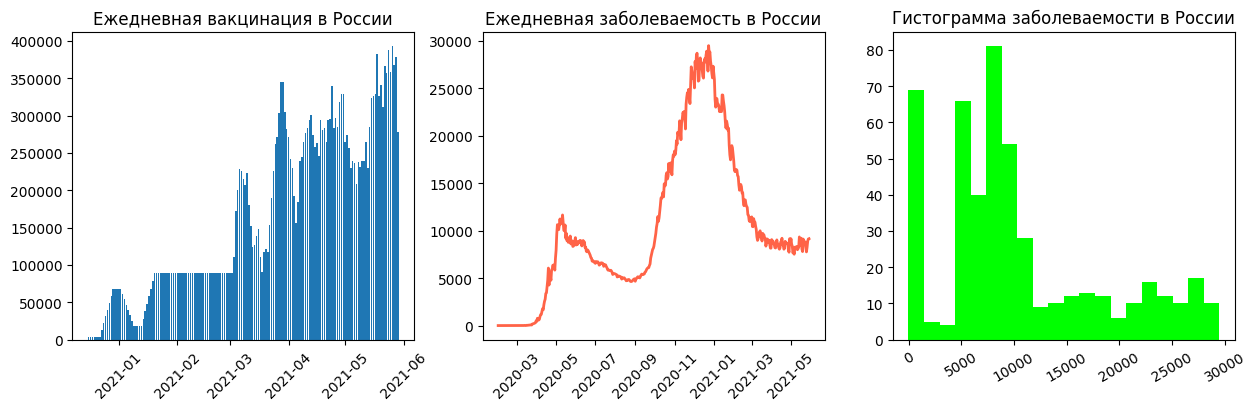

In [23]:
russia_covid = covid_df[covid_df['country']== 'Russia']
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4) )
axes[0].bar(x=russia_covid['date'], height=russia_covid['daily_vaccinations'],label="Число вакцинированных")
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

axes[1].plot(russia_covid['date'], russia_covid['daily_confirmed'], label="Число заболевших",
    color="tomato",
    lw=2,);
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

axes[2].hist(x=russia_covid['daily_confirmed'], label=["Число заболевших"], color="lime", bins=20)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

 Если вы подумали, что Matplotlib — это потолок визуализации в Python, то спешим сообщить вам, что это не так, и представляем Seaborn.

НЕМНОГО О БИБЛИОТЕКЕ

Seaborn — надстройка над библиотекой Matplotlib, которая значительно расширяет её возможности, позволяя создавать графики более высокого уровня с эстетичным оформлением. Библиотека предоставляет большое количество дополнительных опций для творчества при визуализации данных.

In [24]:
import seaborn as sns
print(sns.__version__)

0.13.2


In [25]:
# В данном разделе мы будем сравнивать несколько стран: Россию, Австралию, Германию, Канаду и Великобританию. Создадим специальный DataFrame croped_covid_df для этих данных.

# Для фильтрации по списку значений используем метод isin(), который проверяет, есть ли запись в столбце в переданном в метод списке. В результате возвращается привычная нам маска.

#  А теперь снова немного магии Feature Engineering, чтобы показатели по странам стали сопоставимыми: добавим информацию о населении стран, чтобы рассчитать ежедневную заболеваемость на 100 человек — заболеваемость в процентах от общего количества населения (daily_confirmed_per_hundred).

In [26]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom','Israel']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]
populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690],
    ['Israel', 10000000]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()


date    country  confirmed  deaths  recovered  active  \
0 2020-01-23  Australia        0.0     0.0        0.0     0.0   
1 2020-01-25  Australia        4.0     0.0        0.0     4.0   
2 2020-01-26  Australia        4.0     0.0        0.0     4.0   
3 2020-01-27  Australia        5.0     0.0        0.0     5.0   
4 2020-01-28  Australia        5.0     0.0        0.0     5.0   

   daily_confirmed  daily_deaths  daily_recovered iso_code  ...  \
0              NaN           NaN              NaN      NaN  ...   
1              4.0           0.0              0.0      NaN  ...   
2              0.0           0.0              0.0      NaN  ...   
3              1.0           0.0              0.0      NaN  ...   
4              0.0           0.0              0.0      NaN  ...   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                            NaN                                  NaN   
1                            NaN                                  NaN   
2                            NaN                                  NaN   
3                            NaN                                  NaN   
4                            NaN                                  NaN   

   daily_vaccinations_per_million  vaccines  source_name  source_website  \
0                             NaN       NaN          NaN             NaN   
1                             NaN       NaN          NaN             NaN   
2                             NaN       NaN          NaN             NaN   
3                             NaN       NaN          NaN             NaN   
4                             NaN       NaN          NaN             NaN   

   death_rate  recover_rate  population daily_confirmed_per_hundred  
0         NaN           NaN    25726900                         NaN  
1         0.0           0.0    25726900                    0.000016  
2         0.0           0.0    25726900                    0.000000  
3         0.0           0.0    25726900                    0.000004  
4         0.0           0.0    25726900                    0.000000  

[5 rows x 26 columns]

Построим сразу две гистограммы: одна будет иллюстрировать общее распределение ежедневной заболеваемости (daily_confirmed), а вторая — то же распределение в разрезе стран. 

Для этого создаём две координатные плоскости с помощью метода subplots(). 

На первой координатной плоскости рисуем простую гистограмму с 25 столбцами, а также добавим на неё сглаживающую кривую. 

На второй гистограмме добавляем параметр названия страны по оси y. В таком случае количество наблюдений будет обозначаться на диаграмме яркостью цвета (чем темнее полоса, тем больше наблюдений находится в интервале).

<Axes: xlabel='daily_confirmed_per_hundred', ylabel='country'>

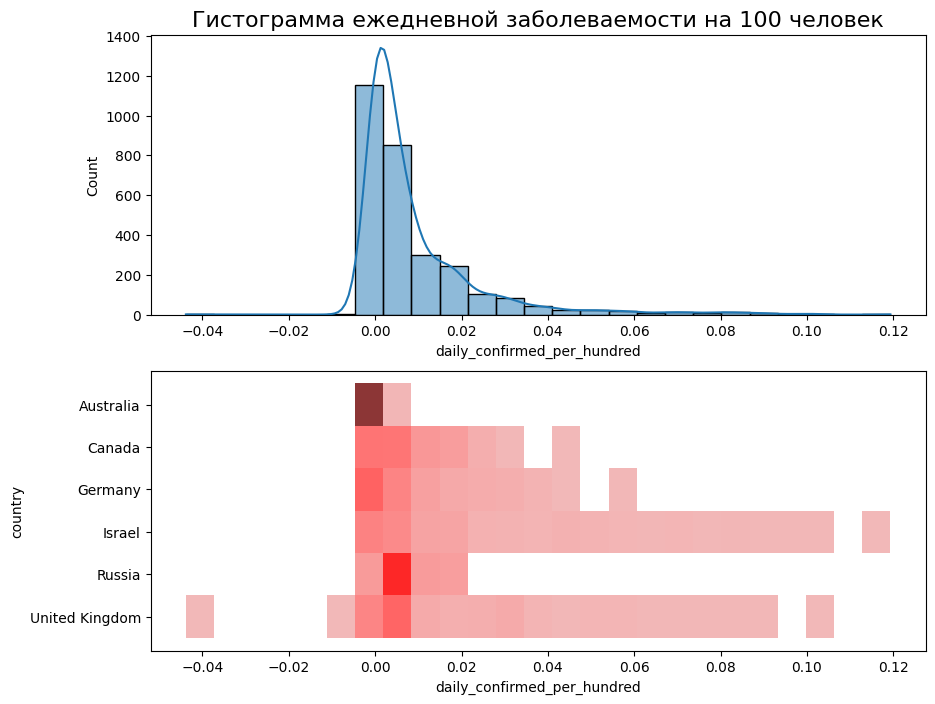

In [27]:
fig,axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
sns.histplot(data=croped_covid_df, x='daily_confirmed_per_hundred', bins=25, kde=True, ax= axes[0])
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(data=croped_covid_df, x='daily_confirmed_per_hundred',y='country',
    bins=25,
    color='red',
    ax=axes[1])


Рассмотрим пример — построим коробчатые диаграммы признака летальности (death_rate), который вы создавали ранее в задании 3.3.

Коробчатые диаграммы в Seaborn строятся с помощью метода boxplot().

Ящики отразим горизонтально (для этого по оси x отложим признак летальности, а по оси y — страны), параметр orient отвечает за ориентацию диаграммы, а width — за ширину коробок:

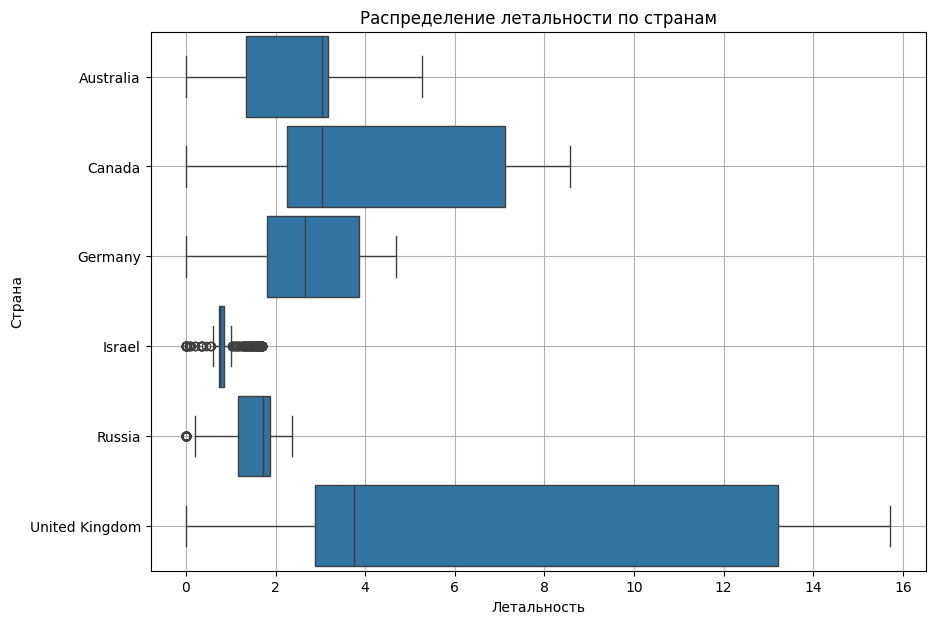

In [28]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

Теперь рассмотрим пример многоуровневой столбчатой диаграммы. С помощью неё мы можем, например, посмотреть на средний ежедневный процент заболевших в странах по кварталам.

Для построения столбчатых диаграмм в Seaborn используется метод barplot(). По умолчанию метод отображает среднее по столбцу, который указан в параметре x (вместо среднего можно вычислить и любую другую статистическую характеристику, наименование которой задаётся в параметре estimator). Для добавления многоуровневости используется параметр hue, который позволяет группировать данные по признаку:

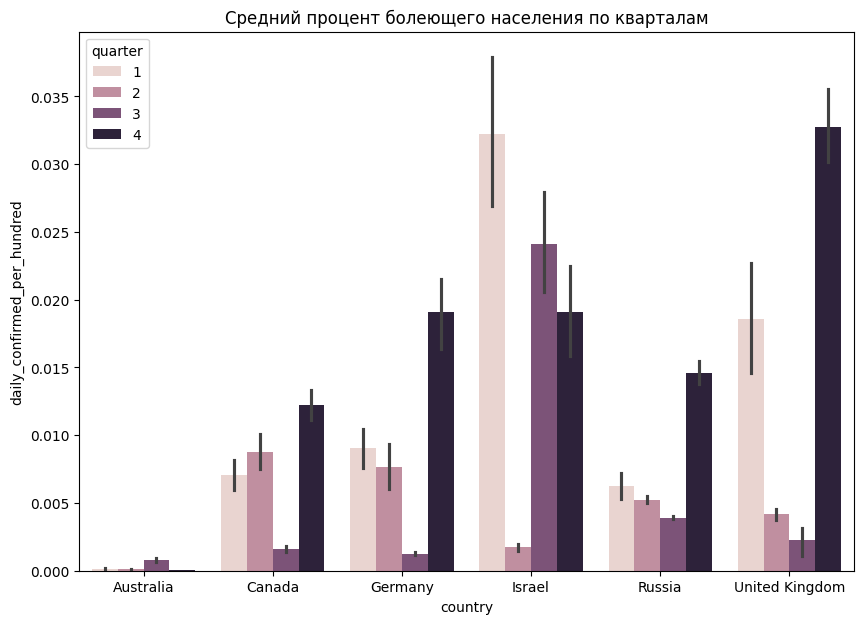

In [29]:
plt.figure(figsize=(10,7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
  data=croped_covid_df, x='country', y='daily_confirmed_per_hundred', hue='quarter'
)
barplot.set_title('Средний процент болеющего населения по кварталам');

Построим один из самых любимых дата-сайентистами графиков — jointplot() — в котором совмещены диаграмма рассеяния и гистограмма. Это довольно удобный и полезный инструмент, когда мы хотим одновременно посмотреть и на распределения переменных, и сразу оценить их взаимосвязь.

Построим jointplot зависимости ежедневной заболеваемости в странах от общей численности населения в процентах (daily_confirmed_per_hundred) от числа полностью вакцинированных в процентах (people_fully_vaccinated_per_hundred).

Параметры xlim и ylim определяют диапазон отображения осей x и y. Параметр height отвечает за высоту и ширину графика (он квадратный).

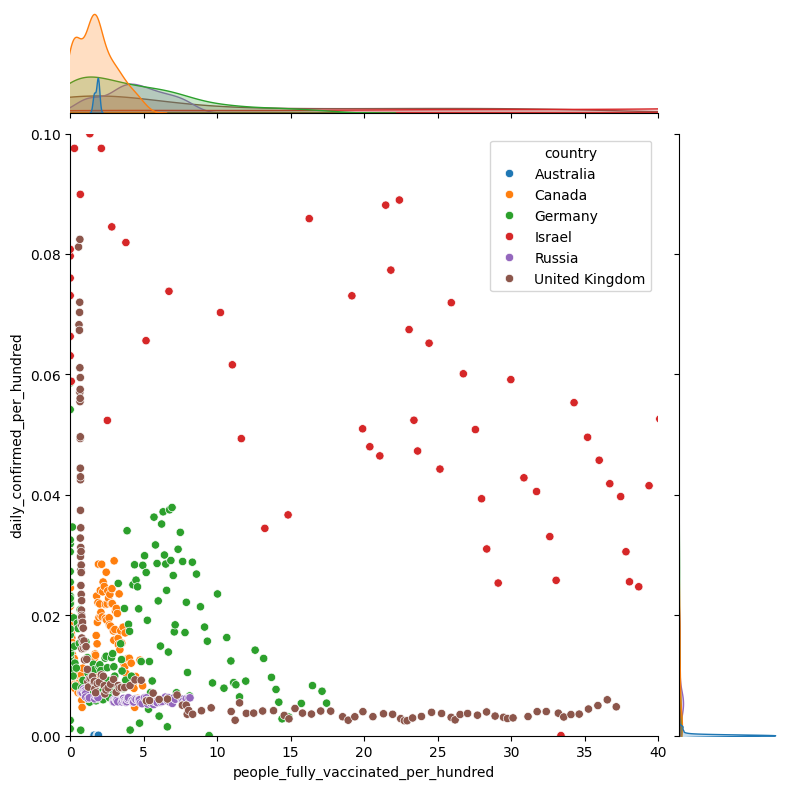

In [30]:
joinplot = sns.jointplot(
  data=croped_covid_df,
  x='people_fully_vaccinated_per_hundred',
  y='daily_confirmed_per_hundred',hue='country',xlim = (0, 40),
    ylim = (0, 0.1),height=8
  
  
)

Из графика для Великобритании и России наблюдается следующая тенденция: с увеличением числа полностью привитых людей уменьшается ежедневное число заболевших. Для Канады и Германии такая же тенденция наблюдается только после достижения отметки в 7 % полностью привитого населения. Однако это может быть стечением обстоятельств, так как вирусологи говорят о необходимости полного вакцинирования 60 % населения в стране для снижения заболеваемости.

Допустим, мы хотим сравнить темпы вакцинации по странам во времени. Вы, скорее всего, сразу подумали о линейном графике. Но давайте мыслить шире. Когда мы хотим сравнить скорость изменения показателей по малому количеству категорий (в данном случае — по странам, а их у нас их всего пять), нагляднее всего будет тепловая карта.

Предварительно создадим сводную таблицу: по столбцам отложим признак даты, а по строкам — страны. В ячейках таблицы будет находиться процент вакцинированных (первым компонентом) людей в стране на определённую дату. Чтобы даты отображались на тепловой карте верно, их необходимо привести к типу string.

In [31]:
pivot = croped_covid_df.pivot_table(
values='people_vaccinated_per_hundred',columns='date',index='country'
)
pivot.columns = pivot.columns.astype('string')


Для построения тепловой карты в Seaborn используется метод heatmap(). Данный метод работает с табличными данными и визуализирует все ячейки таблицы с помощью цвета. Параметр annot отвечает за отображение легенды (аннотации), параметр cmap — за цветовую гамму графика.

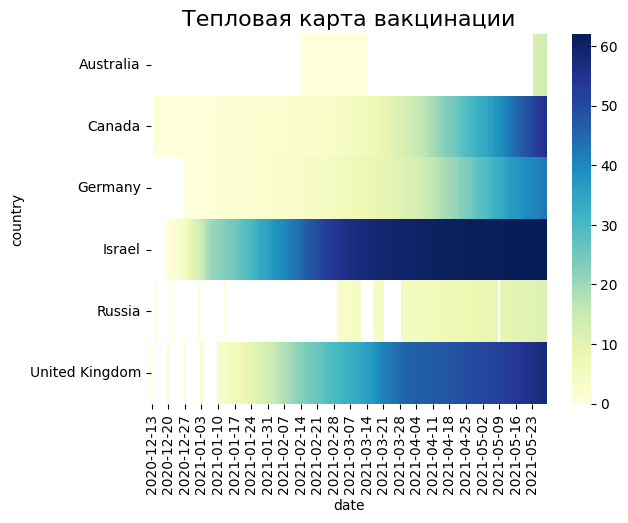

In [32]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

Создайте новый признак confirmed_per_hundred, который покажет процентное отношение заболевших вирусом к общему числу населения в странах ().
Постройте тепловую карту, которая покажет, как росло число заболевших в процентах от общего числа населения (confirmed_per_hundred) в странах из таблицы croped_covid_df.
Выберите верные выводы по построенному графику:

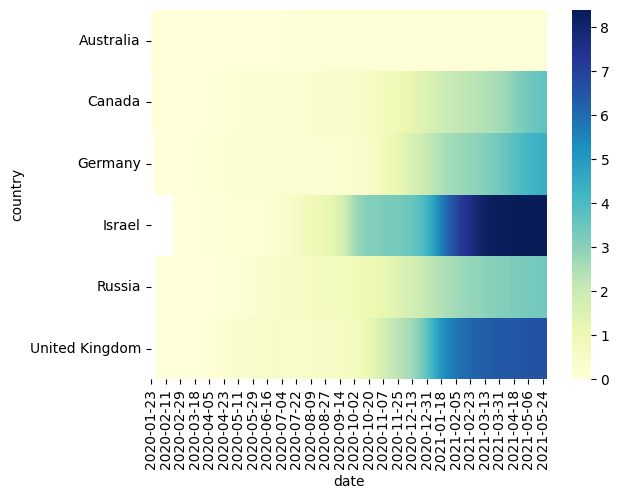

In [33]:
croped_covid_df['confirmed_per_hundred']  = croped_covid_df['confirmed'] / croped_covid_df['population']*100
# croped_covid_df[['date','country','confirmed_per_hundred']][100:154]
pivot_task  = croped_covid_df.pivot_table(values='confirmed_per_hundred',index='country', columns='date')
pivot_task.columns = pivot_task.columns.astype('string')

heatmap_task = sns.heatmap(data=pivot_task, cmap='YlGnBu')
heatmap.set_title('Тепловая карта заболеваний', fontsize=16);


Постройте коробчатую диаграмму для признака recover_rate (отношение выздоровлений к числу зафиксированных случаев заболевания в процентах).

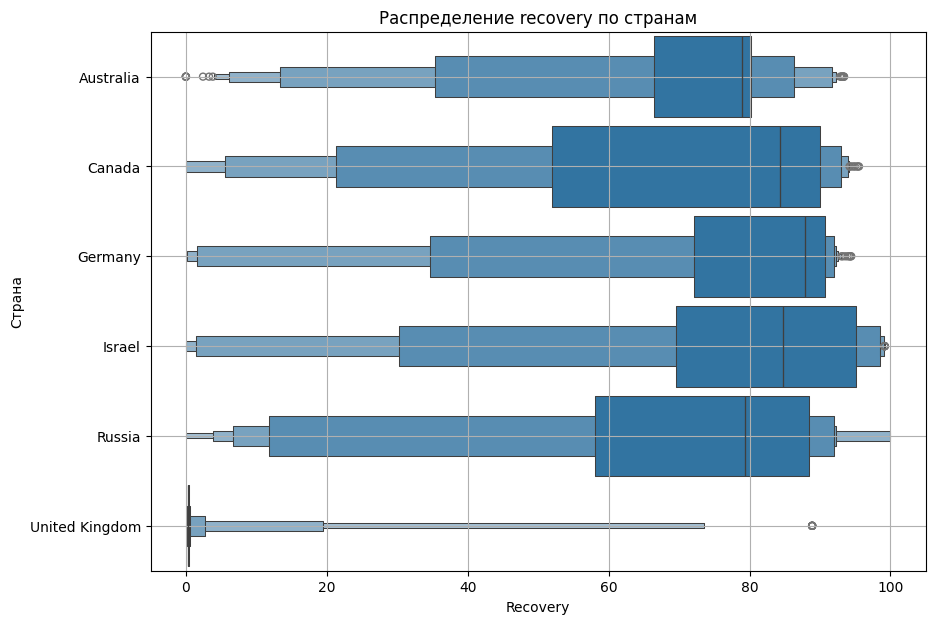

In [34]:
fig = plt.figure(figsize=(10,7))
boxplot_task = sns.boxenplot(
  data=croped_covid_df,
  y='country',
  x='recover_rate',orient='h',
    width=0.9
)
boxplot_task.set_title('Распределение recovery по странам');
boxplot_task.set_xlabel('Recovery');
boxplot_task.set_ylabel('Страна');
boxplot_task.grid()

Библиотека Plotly является сравнительно новым коммерческим продуктом с бесплатной версией, который создавался специально для Data Science, в отличие от относительно старой библиотеки Matplotlib, которая изначально разрабатывалась для научных вычислений.

Из библиотеки нам понадобятся модуль express, он традиционно импортируется под псевдонимом px.

Также импортируем саму библиотеку, чтобы можно было вывести её версию:

In [35]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.22.0


Рассмотрим процесс визуализации на примере. Посмотрим, как выглядит линейный график, построенный с помощью метода line() из модуля express. В документации к методу приведена пара десятков его параметров (они схожи с параметрами других методов) — мы приведём основные из них.

Построим график роста зафиксированного числа случаев заражения (confirmed), смертей (deaths), выздоровлений (recovered) и активных случаев (active) за всё время. Для этого просуммируем статистику по дням и передадим полученный DataFrame в метод line().

Для отображения созданной методом line() фигуры используется метод fig.show():

In [36]:
line_data = covid_df.groupby('date', as_index=False).sum()
line_data['date'] = pd.to_datetime(line_data['date'])
fig = px.line(
    data_frame=line_data, #DataFrame
    x='date', #ось абсцисс
    y=['confirmed', 'recovered', 'deaths', 'active'], #ось ординат
    height=500, #высота
    width=1000, #ширина
    title='Confirmed, Recovered, Deaths, Active cases over Time' #заголовок
)
fig.show()


Давайте рассмотрим ещё один пример — построим столбчатую диаграмму, показывающую ТОП-10 стран по среднему проценту выздоравливающих пациентов (recover_rate). Для этого используем метод bar() модуля express. Добавим несколько параметров:

color — группирующий признак, в соответствии с которым будут раскрашены столбцы диаграммы;
text — текст, который будет подписан на столбцах диаграммы;
orientation — ориентация графика ('v' — вертикальная, 'h' — горизонтальная).

In [40]:
bar_data = covid_df.groupby(by='country', as_index=False)[['recover_rate']].mean().nlargest(10, columns=['recover_rate'])
fig = px.bar(data_frame=bar_data, x='country', y='recover_rate',  color='country',text = 'recover_rate', orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='Top 10 Countries for Recovery Rate')
fig.show()

А теперь давайте построим что-нибудь, специфичное для библиотеки Plotly. Например, график treemap() (древесная, или иерархическая, диаграмма). Такой график используется для исследования показателя, когда число возможных категорий велико (например, число стран в таблице covid_df).

→ Данный вид диаграммы схож с круговой диаграммой и столбчатой диаграммой, однако, в отличие от них, позволяет вместить информацию о гораздо большем числе категорий, не потеряв при этом информативность.

При построении этого графика выделенное пространство разбивается на прямоугольники, соответствующие величине показателя для каждой из категорий: чем меньше прямоугольник, тем меньше в нём значение показателя.

Но, как говорится, лучше один раз увидеть, чем сто раз прочитать. Построим иерархическую диаграмму для среднего ежедневного показателя выздоровевших пациентов (daily_recovered) во всех странах.

In [42]:
#считаем среднее ежедневно фиксируемое количество выздоровевших по странам
tree_map = covid_df.groupby(by='country', as_index=False)[['daily_recovered']].mean()
#строим график
fig = px.treemap(data_frame=tree_map, 
path=['country']  , #категориальный признак, для которого строится график
values='daily_recovered',    height=500, #высота
width=1000, #ширина
title='Daily Recovered Cases by Country' #заголовок
 )
#отображаем график
fig.show()

АНИМАЦИЯ ГРАФИКОВ ВО ВРЕМЕНИ

С помощью plotly.express можно строить даже анимированные графики. Мы рассмотрим только базовые приёмы анимации, но на самом деле это очень интересная и глубокая тема. Если вы захотите, то сможете ознакомиться с ней более детально здесь и здесь.

Для нашей задачи отлично подойдёт график под названием choropleth() (тепловая картограмма) — это тепловая карта, которая строится на географической карте мира. Чтобы увидеть, как изменяется значение показателя на карте во времени, можно добавить в график анимацию.

Кликните на плашку, чтобы увидеть информацию ↓

data_frame — DataFrame, по которому строится график;
locations — название столбца, из которого берутся локации (столбец со странами или регионами);
locationmode — режим геопривязки; определяет, как будет производиться сопоставление данных с картой в Plotly (возможно сопоставление по названию страны, "country_name", или по её трёхзначному шифру, согласно международному стандарту ISO-3);
range_color — диапазон изменения цвета;
animation_frame — анимирующий признак, изменяя который, мы получаем визуализацию во времени;
color_continuous_scale — цветовая палитра.

Итак, построим фоновую картограмму, которая покажет распространение (confirmed) коронавируса в мире во времени.

Предварительно для правильного отображения на анимационном бегунке даты в таблице covid_df необходимо перевести обратно в строковый тип данных.

In [46]:
#преобразуем даты в строковый формат
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

#строим график
#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="confirmed", #от чего зависит цвет
    animation_frame="date", #анимационный бегунок
    range_color=[0, 30e6], #диапазон цвета
    title='Global Spread of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()


ТРЁХМЕРНАЯ ВИЗУАЛИЗАЦИЯ

Настало время познакомиться с 3D-визуализацией.

На самом деле общий принцип построения 3D-графиков ничем не отличается от построения обычных. Просто добавляется ещё один параметр — ось z (ось аппликат).

Давайте рассмотрим пример.

Построим 3D-диаграмму рассеяния, которая покажет, как число ежедневно обнаруживаемых случаев и число ежедневных смертей влияют на желание людей вакцинироваться. Для того чтобы нам было проще рассматривать диаграмму (точки будут более сгруппированными), построим её в логарифмическом масштабе по осям абсцисс и ординат.

Для построения такой диаграммы используем метод scatter_3d(). Добавим несколько параметров:

z — параметр по оси аппликат;
log_x — установка логарифмического масштаба по оси x;
log_y — установка логарифмического масштаба по оси y.
Чтобы не перегрузить график, будем строить зависимость только в нескольких странах: США, России, Великобритании, Бразилии и Франции. Наблюдения для каждой страны окрасим разными цветами.

In [49]:
#фильтруем таблицу по странам
countries=['United States', 'Russia', 'United Kingdom', 'Brazil', 'France']
scatter_data =covid_df[covid_df['country'].isin(countries)]

#строим график
fig = px.scatter_3d(
    data_frame=scatter_data, #DataFrame
    x = 'daily_confirmed', #ось абсцисс
    y = 'daily_deaths', #ось ординат
    z = 'daily_vaccinations', #ось аппликат
    color='country', #расцветка в зависимости от страны
    log_x=True, 
    log_y=True,
    width=1000,
    height=700
)

#отображаем график
fig.show()

Постройте линейный график, который отображает,
 как изменялось ежедневное количество вакцинированных (daily_vaccinations) в мире во времени. 
 Из графика найдите, чему равно количество вакцинированных (в миллионах) 28 февраля 2021 года (2021-02-28). Ответ округлите до целого числа.

In [50]:
line_graph = covid_df.groupby(by='date', as_index=False).sum()
line_graph['date'] = pd.to_datetime(line_data['date'])

fig = px.line(
  data_frame=line_graph,
  x='date',
  y='daily_vaccinations',
   height=500, #высота
    width=1000, #ширина
)
fig.show()

Постройте анимированную тепловую картограмму для числа поставленных вакцин во всём мире (total_vaccinations). На полученной карте найдите, чему равно количество вакцинированных в Японии (Japan) на 24 марта 2021 года (2021-03-24). Ответ приведите в тысячах (без нулей) и округлите до целого числа.
Примечание. Если в jupyter notebook в VS Code не запускается анимация тепловой карты, попробуйте отобразить график командой fig.show(renderer='notebook').

In [51]:
anim_chart = covid_df.sort_values(by='date')
anim_chart['date'] = anim_chart['date'].astype('string')

fig = px.choropleth(
    data_frame=anim_chart, #DataFrame
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="total_vaccinations", #от чего зависит цвет
    animation_frame="date", #анимационный бегунок
    range_color=[0, 30e6], #диапазон цвета
    title='Vaccination', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()